<a href="https://colab.research.google.com/github/habibarezq/ML-Assignments-25/blob/main/Assignment-2/notebooks/comprehensive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part C — Comprehensive Analysis



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import os , sys
## uncomment this if you are running on vs code
# sys.path.append(os.path.abspath("../"))
# from src.logisitc_manual import LogisticRegression
# from src.softmax_manual import SoftmaxRegression
# from src.nn_manual import *
# from src.data_preprocessing import *


# For reproducibility
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [2]:
# comment if you are on vs code
from google.colab import files
uploaded = files.upload()
from logisitc_manual import LogisticRegression
from softmax_manual import SoftmaxRegression
from data_preprocessing import *
from nn_manual import *

Saving data_preprocessing.py to data_preprocessing.py
Saving logisitc_manual.py to logisitc_manual.py
Saving nn_manual.py to nn_manual.py
Saving softmax_manual.py to softmax_manual.py


# Data Loading and Preprocessing

### For Logisitc Regression (Class 0 vs 1)

In [3]:
binary_data = MNISTDataLoader(batch_size=32, binary=True, digits=(0, 1))
train_loader_bin, val_loader_bin, test_loader_bin = binary_data.get_loaders()

100%|██████████| 9.91M/9.91M [00:01<00:00, 4.98MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 130kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.06MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 12.7MB/s]


## For Softmax Regression and NN

In [4]:
multi_data = MNISTDataLoader(batch_size=32, binary=False)
train_loader, val_loader, test_loader = multi_data.get_loaders()

## C1 — Hyperparameter Analysis

### C1.1 Learning Rate Analysis



=== LR = 0.001 ===
Epoch 1/20 Train Loss: 1.9895 Train Acc: 0.3966 Val Loss: 1.6273 Val Acc: 0.6332
Epoch 2/20 Train Loss: 1.2881 Train Acc: 0.7205 Val Loss: 1.0034 Val Acc: 0.7883
Epoch 3/20 Train Loss: 0.8453 Train Acc: 0.8091 Val Loss: 0.7190 Val Acc: 0.8302
Epoch 4/20 Train Loss: 0.6492 Train Acc: 0.8410 Val Loss: 0.5866 Val Acc: 0.8541
Epoch 5/20 Train Loss: 0.5487 Train Acc: 0.8600 Val Loss: 0.5111 Val Acc: 0.8673
Epoch 6/20 Train Loss: 0.4875 Train Acc: 0.8716 Val Loss: 0.4625 Val Acc: 0.8787
Epoch 7/20 Train Loss: 0.4460 Train Acc: 0.8809 Val Loss: 0.4296 Val Acc: 0.8851
Epoch 8/20 Train Loss: 0.4159 Train Acc: 0.8878 Val Loss: 0.4031 Val Acc: 0.8919
Epoch 9/20 Train Loss: 0.3929 Train Acc: 0.8927 Val Loss: 0.3826 Val Acc: 0.8953
Epoch 10/20 Train Loss: 0.3747 Train Acc: 0.8972 Val Loss: 0.3671 Val Acc: 0.8995
Epoch 11/20 Train Loss: 0.3596 Train Acc: 0.9008 Val Loss: 0.3539 Val Acc: 0.9017
Epoch 12/20 Train Loss: 0.3469 Train Acc: 0.9035 Val Loss: 0.3420 Val Acc: 0.9037
Epoch

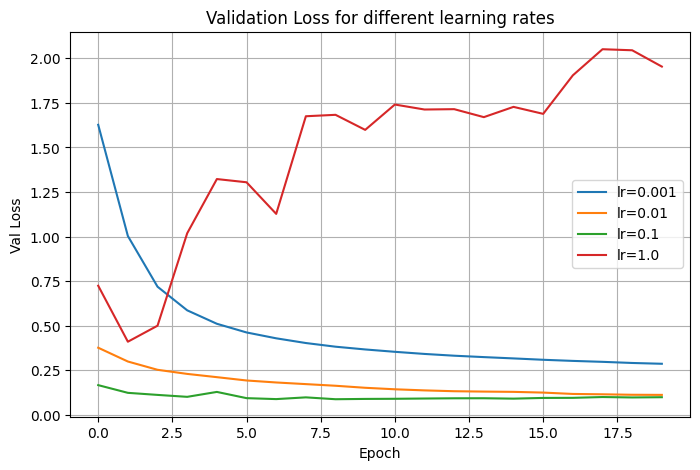

,lr,final_val_acc
0,0.001,0.918857
1,0.010,0.965929
2,0.100,0.977786
3,1.000,0.185429


In [5]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
num_epochs = 20
batch_size = 64
results_lr = []
for lr in learning_rates:
    print(f"\n=== LR = {lr} ===")
    model = CustomFeedforwardNN()
    tl, vl, ta, va = train_model_once(model, train_loader, val_loader, epochs=num_epochs, learning_rate=lr)
    results_lr.append({'lr': lr, 'train_losses': tl, 'val_losses': vl, 'train_acc': ta, 'val_acc': va})

# Plot validation loss comparison
plt.figure(figsize=(8,5))
for res in results_lr:
    plt.plot(res['val_losses'], label=f"lr={res['lr']}")
plt.xlabel('Epoch'); plt.ylabel('Val Loss'); plt.title('Validation Loss for different learning rates'); plt.legend(); plt.grid(True); plt.show()

# Summarize final val accuracy
pd.DataFrame([{'lr': r['lr'], 'final_val_acc': r['val_acc'][-1]} for r in results_lr])


### C1.2 Batch Size Analysis



=== Batch size = 16 ===
Epoch 1/20 Train Loss: 0.7588 Train Acc: 0.8030 Val Loss: 0.3768 Val Acc: 0.8924
Epoch 2/20 Train Loss: 0.3302 Train Acc: 0.9059 Val Loss: 0.3026 Val Acc: 0.9153
Epoch 3/20 Train Loss: 0.2754 Train Acc: 0.9218 Val Loss: 0.2610 Val Acc: 0.9268
Epoch 4/20 Train Loss: 0.2401 Train Acc: 0.9318 Val Loss: 0.2374 Val Acc: 0.9335
Epoch 5/20 Train Loss: 0.2138 Train Acc: 0.9397 Val Loss: 0.2142 Val Acc: 0.9392
Epoch 6/20 Train Loss: 0.1926 Train Acc: 0.9450 Val Loss: 0.1976 Val Acc: 0.9428
Epoch 7/20 Train Loss: 0.1749 Train Acc: 0.9503 Val Loss: 0.1816 Val Acc: 0.9479
Epoch 8/20 Train Loss: 0.1602 Train Acc: 0.9547 Val Loss: 0.1698 Val Acc: 0.9508
Epoch 9/20 Train Loss: 0.1477 Train Acc: 0.9579 Val Loss: 0.1615 Val Acc: 0.9542
Epoch 10/20 Train Loss: 0.1369 Train Acc: 0.9615 Val Loss: 0.1550 Val Acc: 0.9563
Epoch 11/20 Train Loss: 0.1274 Train Acc: 0.9639 Val Loss: 0.1471 Val Acc: 0.9576
Epoch 12/20 Train Loss: 0.1191 Train Acc: 0.9664 Val Loss: 0.1422 Val Acc: 0.9585


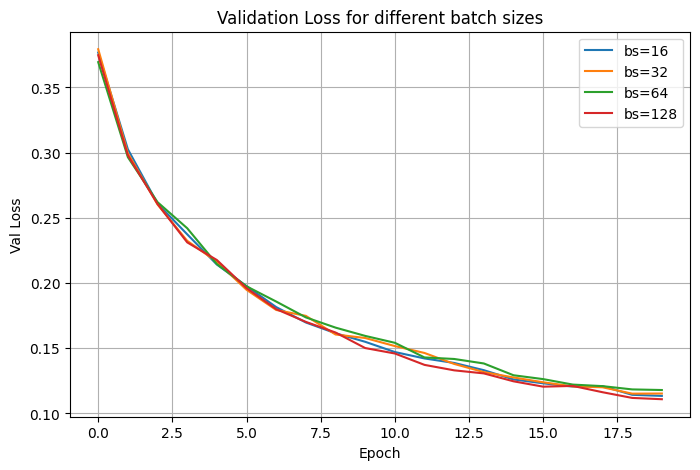

,batch_size,final_val_acc,time_s
0,16,0.965857,48.298809
1,32,0.967071,48.204871
2,64,0.965143,48.136029
3,128,0.966643,48.291495


In [6]:
batch_sizes = [16, 32, 64, 128]
num_epochs = 20
results_bs = []

try: # If tensors for X_train_flat exist, recreate DataLoaders with different batch sizes
    X_train_flat
    recreate_loaders = True
except NameError:
    recreate_loaders = False

for bs in batch_sizes:
    print(f"\n=== Batch size = {bs} ===")
    if recreate_loaders:
        multi_data = MNISTDataLoader(batch_size=bs, binary=False)
        train_loader_bs, val_loader_bs,_ = multi_data.get_loaders()
        # train_loader_bs = DataLoader(TensorDataset(X_train_flat, y_train), batch_size=bs, shuffle=True)
        # val_loader_bs = DataLoader(TensorDataset(X_val_flat, y_val), batch_size=bs, shuffle=False)
    else:
        train_loader_bs = train_loader; val_loader_bs = val_loader
    model = CustomFeedforwardNN()
    start = time.time()
    tl, vl, ta, va = train_model_once(model, train_loader_bs, val_loader_bs, epochs=num_epochs, learning_rate=0.01)
    duration = time.time() - start
    results_bs.append({'bs': bs, 'train_losses': tl, 'val_losses': vl, 'train_acc': ta, 'val_acc': va, 'time_s': duration})

plt.figure(figsize=(8,5))
for res in results_bs:
    plt.plot(res['val_losses'], label=f"bs={res['bs']}")
plt.xlabel('Epoch'); plt.ylabel('Val Loss'); plt.title('Validation Loss for different batch sizes'); plt.legend(); plt.grid(True); plt.show()

pd.DataFrame([{'batch_size': r['bs'], 'final_val_acc': r['val_acc'][-1], 'time_s': r['time_s']} for r in results_bs])

### C1.3 Architecture Analysis


Function to make fully connected NN based on number of hidden layers

In [7]:
def make_ffnn(hidden_sizes):
    # hidden_sizes: list of ints
    if len(hidden_sizes) == 1:
        return CustomFeedforwardNN(input_size=784, hidden1_size=hidden_sizes[0], hidden2_size=64, output_size=10)
    elif len(hidden_sizes) == 2:
        return CustomFeedforwardNN(input_size=784, hidden1_size=hidden_sizes[0], hidden2_size=hidden_sizes[1], output_size=10)
    else:
        # for >2 layers create dynamic module
        return FFN_dynamic(input_dim=784, hidden_sizes=hidden_sizes, output_dim=10)

In [8]:
layers_options = [ [64,64], [128,64], [256,128,64], [512,256,128,64] ]
results_arch = []
for hidden in layers_options:
    print(f"\n=== Arch: {hidden} ===")
    model = make_ffnn(hidden)
    tl, vl, ta, va = train_model_once(model, train_loader, val_loader, epochs=20, learning_rate=0.01)
    results_arch.append({'hidden': hidden, 'train_acc': ta[-1], 'val_acc': va[-1], 'train_losses': tl, 'val_losses': vl})

pd.DataFrame([{'architecture': str(r['hidden']), 'train_acc': r['train_acc'], 'val_acc': r['val_acc']} for r in results_arch])



=== Arch: [64, 64] ===
Epoch 1/20 Train Loss: 0.8277 Train Acc: 0.7850 Val Loss: 0.4030 Val Acc: 0.8857
Epoch 2/20 Train Loss: 0.3497 Train Acc: 0.9003 Val Loss: 0.3132 Val Acc: 0.9115
Epoch 3/20 Train Loss: 0.2978 Train Acc: 0.9146 Val Loss: 0.2810 Val Acc: 0.9209
Epoch 4/20 Train Loss: 0.2665 Train Acc: 0.9227 Val Loss: 0.2605 Val Acc: 0.9260
Epoch 5/20 Train Loss: 0.2421 Train Acc: 0.9303 Val Loss: 0.2351 Val Acc: 0.9336
Epoch 6/20 Train Loss: 0.2216 Train Acc: 0.9355 Val Loss: 0.2228 Val Acc: 0.9378
Epoch 7/20 Train Loss: 0.2035 Train Acc: 0.9417 Val Loss: 0.2142 Val Acc: 0.9387
Epoch 8/20 Train Loss: 0.1887 Train Acc: 0.9461 Val Loss: 0.1946 Val Acc: 0.9438
Epoch 9/20 Train Loss: 0.1758 Train Acc: 0.9494 Val Loss: 0.1792 Val Acc: 0.9480
Epoch 10/20 Train Loss: 0.1649 Train Acc: 0.9535 Val Loss: 0.1739 Val Acc: 0.9496
Epoch 11/20 Train Loss: 0.1542 Train Acc: 0.9558 Val Loss: 0.1678 Val Acc: 0.9511
Epoch 12/20 Train Loss: 0.1460 Train Acc: 0.9587 Val Loss: 0.1578 Val Acc: 0.9531
E

,architecture,train_acc,val_acc
0,"[64, 64]",0.971143,0.960429
1,"[128, 64]",0.978333,0.966643
2,"[256, 128, 64]",0.992048,0.964714
3,"[512, 256, 128, 64]",0.997571,0.968429


## C2 — Model Comparison


Function to evaluate on test data

In [9]:
def evaluate_nn_on_loader(model, loader):
    model.to(device); model.eval()
    correct = 0; total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            correct += (preds.cpu() == y_batch).sum().item()
            total += y_batch.size(0)
    return correct/total, np.array(y_true), np.array(y_pred)

In [13]:
# Logistic Regression (Binary)
print("Binary Logisitic Regression Training")
log_model = LogisticRegression(input_dim=784, learning_rate=0.01, max_epochs=50,patience=5)
start_log = time.time()
log_model.fit(train_loader_bin, val_loader_bin)
log_time = time.time() - start_log


# Softmax Regression (multiclass)
print("Softmax Training")
soft_model = SoftmaxRegression(input_dim=784, num_classes=10, learning_rate=0.01,max_epochs=50,patience=5,early_stopping=False)
start_soft=time.time()
soft_model.fit(train_loader, val_loader)
soft_time = time.time() - start_soft

# Neural network
print("NN Training")
best_hidden = results_arch[3]['hidden'] if len(results_arch)>1 else [128,64]
best_model = make_ffnn(best_hidden)
start = time.time()
tl, vl, ta, va = train_model_once(best_model, train_loader, val_loader, epochs=30, learning_rate=0.01)
nn_time = time.time() - start

# Evaluate Logistic on test
_,_,log_test_loss, log_test_acc = log_model.evaluate_test(binary_data.X_test, binary_data.y_test)
print('Logistic test acc:', log_test_acc)


# Evaluate Softmax on test
_,_,soft_test_loss, soft_test_acc = soft_model.evaluate_test(multi_data.X_test,multi_data.y_test)
print('Softmax test acc:', soft_test_acc)

# Evaluate NN on test
nn_test_acc, y_true_nn, y_pred_nn = evaluate_nn_on_loader(best_model, test_loader)
print('NN test acc:', nn_test_acc)

if torch.is_tensor(log_test_acc) and log_test_acc.numel() > 1:
    log_test_acc = (log_test_acc.mean()).item()
elif torch.is_tensor(log_test_acc):
    log_test_acc = log_test_acc.item()

# Summary table
comparison = pd.DataFrame([
    {'Model': 'Binary Logistic Regression', 'Test Accuracy': float(log_test_acc), 'Training Time': log_time},
    {'Model': 'Softmax Regression', 'Test Accuracy': float(soft_test_acc), 'Training Time': soft_time},
    {'Model': f'Neural Network {best_hidden}', 'Test Accuracy': float(nn_test_acc), 'Training Time': nn_time}
])
comparison

Binary Logisitic Regression Training
Epoch 10/50 - Train Loss: 0.0117, Train Acc: 0.9985 - Val Loss: 0.0126, Val Acc: 0.9970
Epoch 20/50 - Train Loss: 0.0078, Train Acc: 0.9985 - Val Loss: 0.0093, Val Acc: 0.9970
Epoch 30/50 - Train Loss: 0.0063, Train Acc: 0.9988 - Val Loss: 0.0081, Val Acc: 0.9970
Epoch 40/50 - Train Loss: 0.0054, Train Acc: 0.9988 - Val Loss: 0.0074, Val Acc: 0.9976
Epoch 50/50 - Train Loss: 0.0048, Train Acc: 0.9988 - Val Loss: 0.0071, Val Acc: 0.9983
Softmax Training
Epoch 10/50 - Train Loss: 0.3332, Train Acc: 0.9077 - Val Loss: 0.3342, Val Acc: 0.9089
Epoch 20/50 - Train Loss: 0.3016, Train Acc: 0.9162 - Val Loss: 0.3086, Val Acc: 0.9160
Epoch 30/50 - Train Loss: 0.2876, Train Acc: 0.9202 - Val Loss: 0.2968, Val Acc: 0.9190
Epoch 40/50 - Train Loss: 0.2789, Train Acc: 0.9223 - Val Loss: 0.2912, Val Acc: 0.9204
Epoch 50/50 - Train Loss: 0.2727, Train Acc: 0.9243 - Val Loss: 0.2879, Val Acc: 0.9207
NN Training
Epoch 1/30 Train Loss: 0.7065 Train Acc: 0.8060 Val Lo

,Model,Test Accuracy,Training Time
0,Binary Logistic Regression,0.997632,11.905818
1,Softmax Regression,0.916286,63.905555
2,"Neural Network [512, 256, 128, 64]",0.975643,89.160058


Conclusion:

Logistic Regression, Softmax Regression, and Neural Networks differ in both their computational complexity and their ability to capture relationships in data.

1. Logistic Regression is best suited for binary classification tasks.When data is linearly separable ,logistic regression offers a transparent view of how input features influence predictions. However, it cannot handle multiple classes directly without a one-vs-rest setup, and it fails to capture non-linear relationships.

2. Softmax Regression, also known as multinomial logistic regression, acts as an extension for logistic regression to multiclass problems. It maintains efficiency and interpretability while handling multiple output categories. Despite its simplicity, it struggles when the decision boundaries between classes are highly non-linear or complex.

3. Neural Networks (Feedforward Models) represent a powerful generalization that can capture complex, non-linear patterns. By stacking multiple layers, they learn abstract representations of data and can achieve way better accuracy But, they come at the cost of higher computational requirements, longer training time. and they require careful tuning of hyperparameters (learning rate, number of layers, neurons) to achieve stable convergence.

In summary, Logistic Regression and Softmax Regression serve as efficient and interpretable models for linear relationships. Neural Networks, as they're more complex,making them more suitable for large-scale or highly non-linear tasks. The choice of model depends on the problem complexity, dataset size and other parameters.

## C2.1 Confusion Matrix & Misclassified Examples (Best NN)


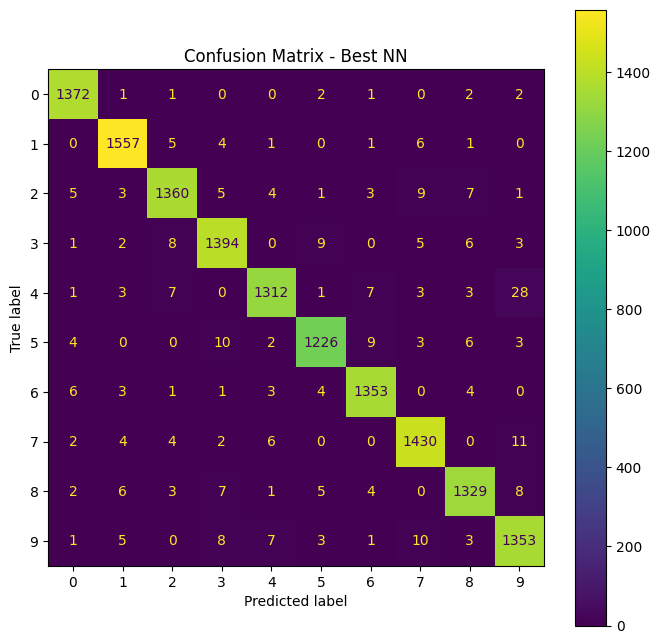

Total misclassified: 314


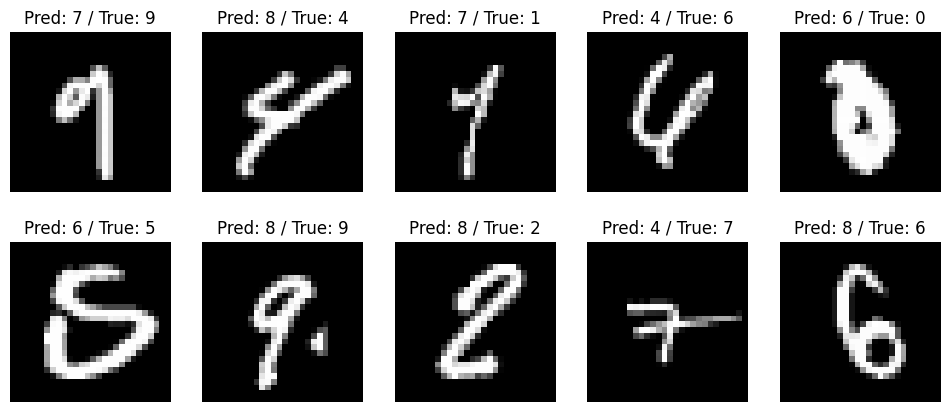

In [11]:
cm = confusion_matrix(y_true_nn, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax)
plt.title('Confusion Matrix - Best NN')
plt.show()

# Show some misclassified examples
mis_idx = np.where(y_true_nn != y_pred_nn)[0]
print('Total misclassified:', len(mis_idx))


dataset_for_vis = test_loader.dataset
fig, axes = plt.subplots(2,5, figsize=(12,5))
for i, ax in enumerate(axes.flat):
    if i >= len(mis_idx): break
    idx = mis_idx[i]
    # if dataset stores flattened images, reshape
    img_flat, true_label = dataset_for_vis[idx]
    if img_flat.ndim == 1:
        img = img_flat.reshape(28,28)
    else:
        img = img_flat.squeeze()
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {y_pred_nn[idx]} / True: {y_true_nn[idx]}")
    ax.axis('off')
plt.show()

## C3 — Final Evaluation & Retraining Best Model on Train+Val


In [12]:
# Combine train + val into one dataset and retrain best model
final_model = make_ffnn(best_hidden)
# train
train_model_once(final_model, train_loader, test_loader, epochs=30, learning_rate=0.01)
final_acc, y_true_final, y_pred_final = evaluate_nn_on_loader(final_model, test_loader)
print('Final test acc after retraining on train+val:', final_acc)

Epoch 1/30 Train Loss: 0.6788 Train Acc: 0.8174 Val Loss: 0.3199 Val Acc: 0.9053
Epoch 2/30 Train Loss: 0.2622 Train Acc: 0.9231 Val Loss: 0.2346 Val Acc: 0.9323
Epoch 3/30 Train Loss: 0.1984 Train Acc: 0.9430 Val Loss: 0.2018 Val Acc: 0.9389
Epoch 4/30 Train Loss: 0.1593 Train Acc: 0.9540 Val Loss: 0.1774 Val Acc: 0.9468
Epoch 5/30 Train Loss: 0.1314 Train Acc: 0.9617 Val Loss: 0.1540 Val Acc: 0.9549
Epoch 6/30 Train Loss: 0.1099 Train Acc: 0.9682 Val Loss: 0.1269 Val Acc: 0.9610
Epoch 7/30 Train Loss: 0.0937 Train Acc: 0.9732 Val Loss: 0.1178 Val Acc: 0.9636
Epoch 8/30 Train Loss: 0.0804 Train Acc: 0.9764 Val Loss: 0.1219 Val Acc: 0.9631
Epoch 9/30 Train Loss: 0.0682 Train Acc: 0.9801 Val Loss: 0.1033 Val Acc: 0.9681
Epoch 10/30 Train Loss: 0.0595 Train Acc: 0.9828 Val Loss: 0.1020 Val Acc: 0.9680
Epoch 11/30 Train Loss: 0.0504 Train Acc: 0.9863 Val Loss: 0.1019 Val Acc: 0.9690
Epoch 12/30 Train Loss: 0.0439 Train Acc: 0.9881 Val Loss: 0.0934 Val Acc: 0.9721
Epoch 13/30 Train Loss: 0